In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [ ]:
dataset = pd.read_csv('OnlineRetailData.csv')

In [ ]:
dataset

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4288,18278.0,173.90,9,73
4289,18280.0,180.60,10,277
4290,18281.0,80.82,7,180
4291,18282.0,176.60,13,7


In [ ]:
dataset.shape

(4293, 4)

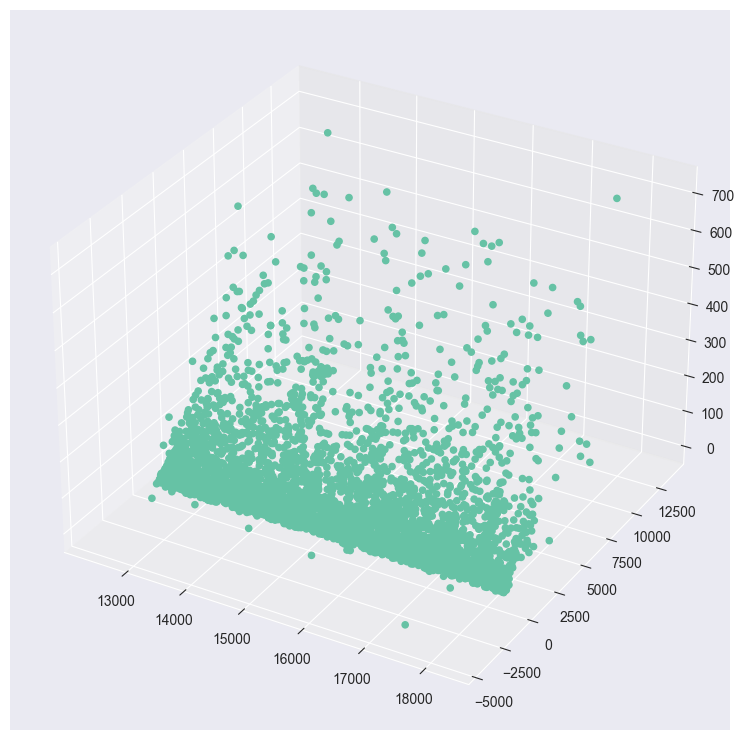

In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2], alpha=1)
plt.show()

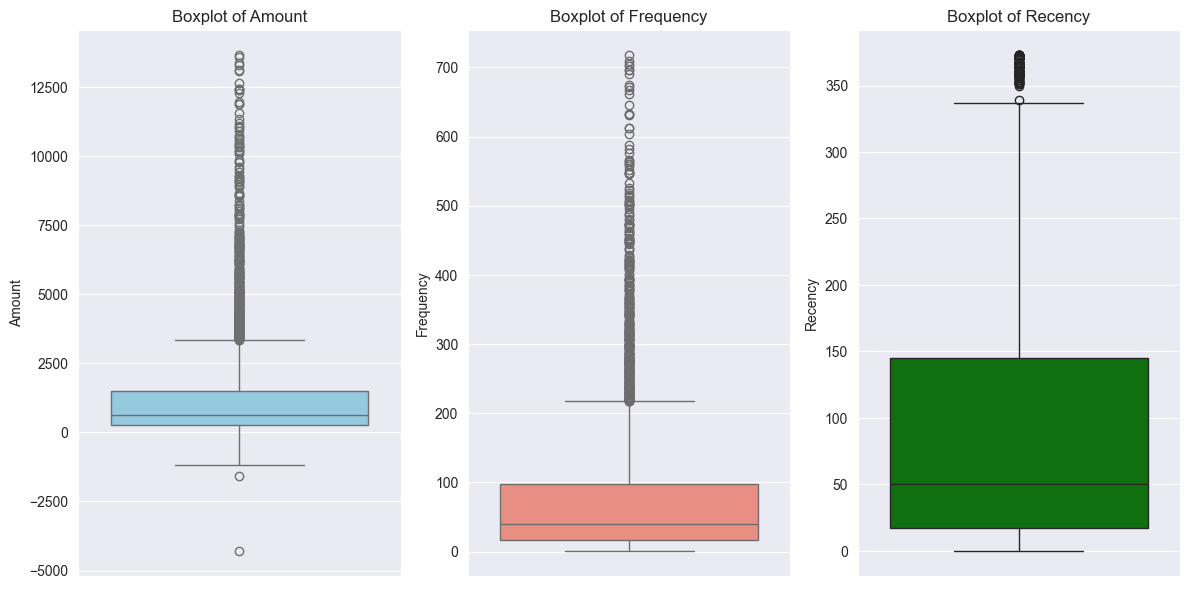

In [ ]:
 # Plot boxplots for each feature providing visual summary of the central tendency, dispersion, and skewness of each feature's distribution, including potential outliers.
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=dataset['Amount'], color='skyblue')
plt.title('Boxplot of Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=dataset['Frequency'], color='salmon')
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=dataset['Recency'], color='green')
plt.title('Boxplot of Recency')

plt.tight_layout()
plt.show()

In [ ]:
# Q1.1. Preprocess and clean the dataset (Note: Make sure to document your preprocessing step): This step should include the following:
#     - Dealing with the missing data
#     - Dealing with the irregular data (outliers)
#     - Dealing with the unnecessary data
#     - Dealing with the inconsistent data
#     - Encoding categorical data ???

In [ ]:
# Checking for missing data

dataset.isna().sum()

CustomerID    0
Amount        0
Frequency     0
Recency       0
dtype: int64

In [ ]:
# Dealing with the irregular data (outliers)

from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(dataset[['Amount', 'Frequency', 'Recency']])

# Absolute Z-scores
abs_z_scores = np.abs(z_scores)

# Remove rows with outliers (threshold Z-score of 3)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cleaned_dataset = dataset[filtered_entries]

cleaned_dataset

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4288,18278.0,173.90,9,73
4289,18280.0,180.60,10,277
4290,18281.0,80.82,7,180
4291,18282.0,176.60,13,7


In [ ]:
# Dealing with the unnecessary data

# drop the unnecessary column 'CustomerID'
cleaned_dataset.drop('CustomerID', axis=1, inplace=True)

cleaned_dataset

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_24255/3660201904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset.drop('CustomerID', axis=1, inplace=True)


,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4288,173.90,9,73
4289,180.60,10,277
4290,80.82,7,180
4291,176.60,13,7


In [ ]:
# Standardizing the Dataset 

scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(cleaned_dataset)
dataset_scaled

array([[-0.89295225, -0.88771492,  2.25245905],
       [ 2.85830067,  1.67382399, -0.93087575],
       [ 0.67129411, -0.47502254, -0.21364291],
       ...,
       [-0.82260973, -0.81656106,  0.82781847],
       [-0.73924662, -0.73117643, -0.8719251 ],
       [ 0.70614333,  0.07997756, -0.52804635]])

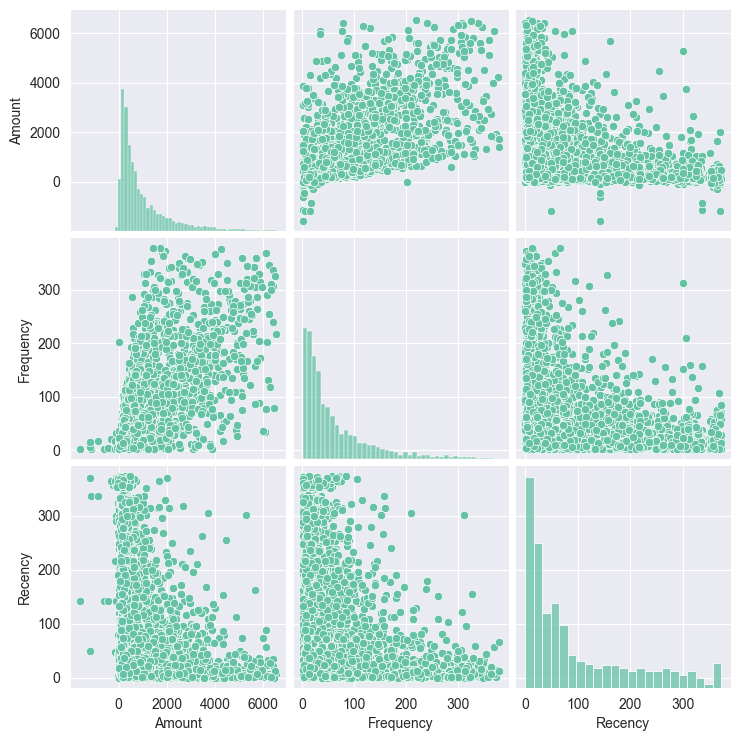

In [ ]:
# Q1.2. Visualize the dataset

# Pairplot for visualizing relationships between variables
sns.pairplot(cleaned_dataset)
plt.show()

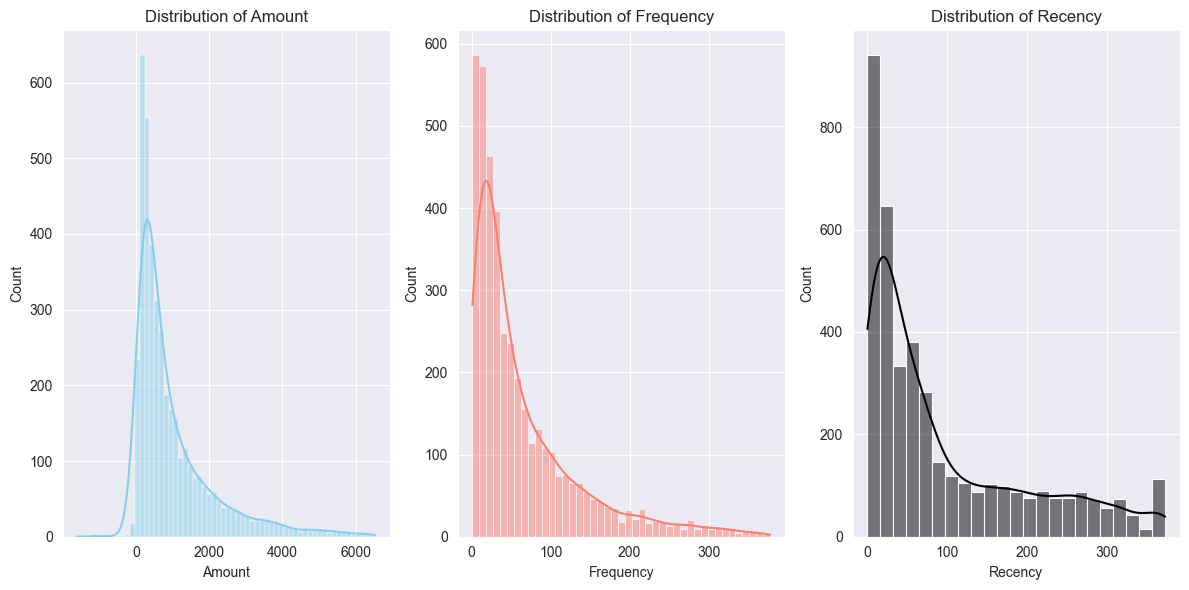

In [ ]:
# Plot histograms showing distribution of each feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(cleaned_dataset['Amount'], kde=True, color='skyblue')
plt.title('Distribution of Amount')

plt.subplot(1, 3, 2)
sns.histplot(cleaned_dataset['Frequency'], kde=True, color='salmon')
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(cleaned_dataset['Recency'], kde=True, color='black')
plt.title('Distribution of Recency')

plt.tight_layout()
plt.show()


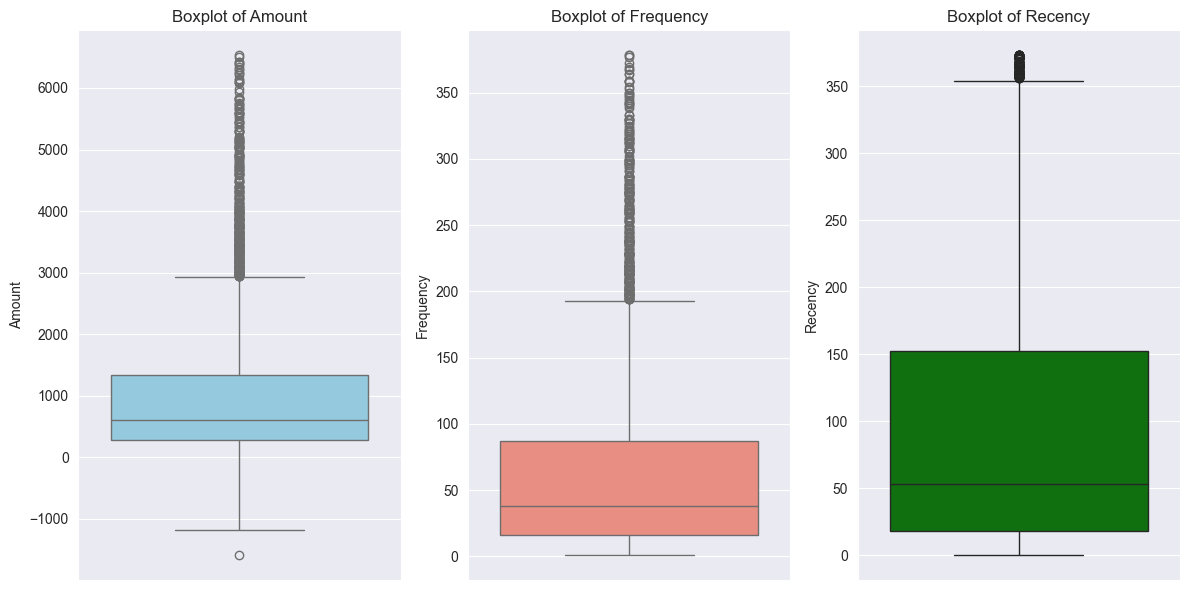

In [ ]:
 # Plot boxplots for each feature providing visual summary of the central tendency, dispersion, and skewness of each feature's distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=cleaned_dataset['Amount'], color='skyblue')
plt.title('Boxplot of Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=cleaned_dataset['Frequency'], color='salmon')
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=cleaned_dataset['Recency'], color='green')
plt.title('Boxplot of Recency')

plt.tight_layout()
plt.show()


Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability

Based on the observations in the visualizations, pairplots suggest that there might be some correlations between 'Amount' and 'Frequency', as well as between 'Frequency' and 'Recency', although not linear. The histograms show the distributions of 'Amount' and 'Frequency' to be right-skewed, with most values concentrated towards lower amounts. This indicates potential outliers towards higher amounts.

In [ ]:
# Q1.4. Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.

# Select features for clustering
X = cleaned_dataset[['Amount', 'Frequency', 'Recency']]

# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

cluster_labels

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 0, ..., 1, 1, 0], dtype=int32)

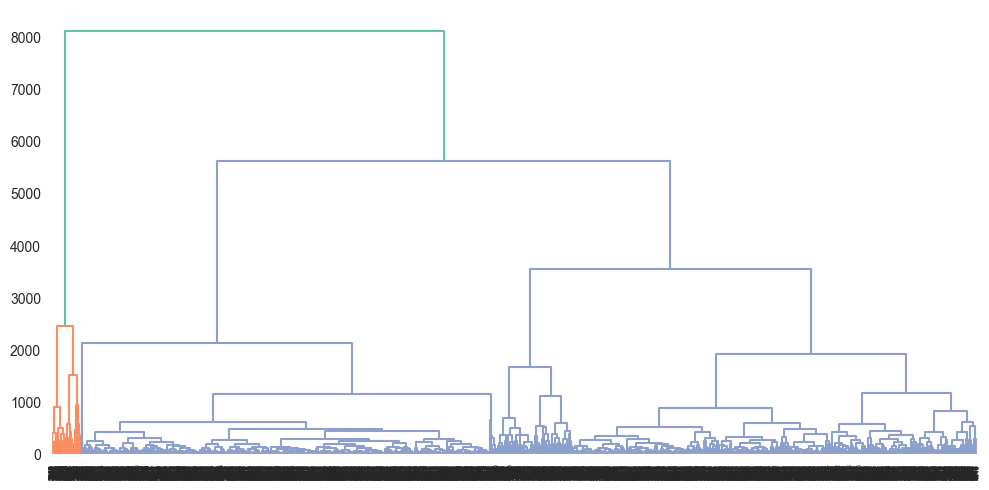

In [ ]:
# Q1.5. Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.

from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
mergings = linkage(X, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 0, 0, 2])

In [ ]:
cleaned_dataset['h_clusters'] = cluster_labels
cleaned_dataset.head()

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_24255/2668953474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['h_clusters'] = cluster_labels


,Amount,Frequency,Recency,h_clusters
0,0.00,2,325,0
1,4310.00,182,1,1
2,1797.24,31,74,2
3,1757.55,73,18,2
4,334.40,17,309,0


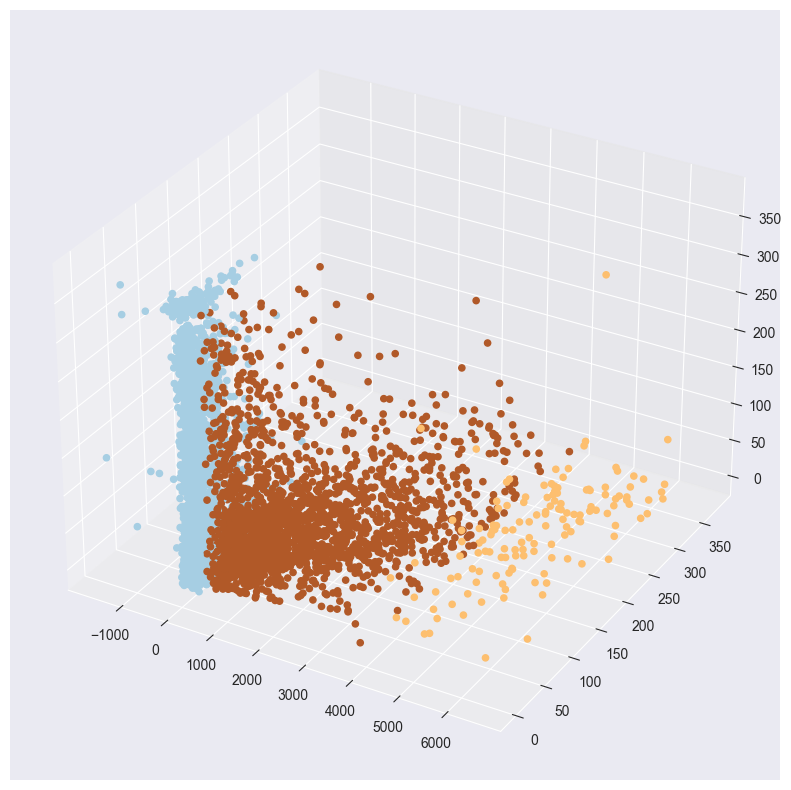

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_dataset.iloc[:, 0], cleaned_dataset.iloc[:, 1], cleaned_dataset.iloc[:, 2], c=cleaned_dataset['h_clusters'], alpha=1, cmap='Paired')
plt.show()